In [ ]:
! pip install speechrecognition
! pip install pyaudio
! pip install pyttsx3
! pip install pydub
! pip install pysptk
!pip install speechpy
! pip install wave
! pip install scipy
! pip install vosk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 25.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.8/46.8 kB 5.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for pyaudio (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pyaudio
Failed to build pyaudio
ERROR: Could not build wheels for pyaudio, which is required to install pyproject.toml-based projects
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/pub

In [ ]:
import speech_recognition as sr
import pyttsx3
import wave
import math
import json
from vosk import Model, KaldiRecognizer, SetLogLevel
from prettytable import PrettyTable
import networkx as nx
import nltk
import nltk.corpus
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from pydub import AudioSegment
from pydub.silence import split_on_silence
import scipy
from scipy.io import wavfile
from scipy.io.wavfile import read
import os
import csv
import pandas as pd
import collections
import matplotlib.pyplot as plt
import numpy as np
import io
import pandas 
import librosa
from pydub.silence import detect_nonsilent
import spacy
from spacy import displacy
from tabulate import tabulate

nlp = spacy.load("en_core_web_sm")
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 

tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

r = sr.Recognizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def audiotolist(audio):
  with audio as source:
    readfile = r.record(source)
    text = r.recognize_google(readfile)

    audio_list = word_tokenize(text)
    new_list = [word[0].lower() + word[1:] for word in audio_list]
    
    return new_list

In [ ]:
def silencerecognition(length):
  sound=AudioSegment.from_wav(path)
  chunks=split_on_silence(sound,
    min_silence_len=500,
    silence_thresh=sound.dBFS-14,
    keep_silence=500,   
  )
  folder_name="audio_chunks"
  if not os.path.isdir(folder_name):
    os.mkdir(folder_name)
  whole_text = ""
  for i, audio_chunk in enumerate(chunks, start=1):
        chunk_filename = os.path.join(folder_name, f"chunk{i}.wav") 
        #samplerate,data[i]=read("audio_chunks/chunk[i].wav")
        #duration[i]=len(data[i])/samplerate
        audio_chunk.export(chunk_filename, format="wav")
        with sr.AudioFile(chunk_filename) as source:
          audio_listened = r.record(source)
          try:
            text = r.recognize_google(audio_listened)
          except sr.UnknownValueError as e:
            print("Error:", str(e))
          else:
            text = f"{text.capitalize()}. "
            #print(chunk_filename, ":", text)
            #whole_text += text
  samplerate,data1=read("audio_chunks/chunk1.wav")
  duration1=len(data1)/samplerate
  samplerate,data2=read("audio_chunks/chunk2.wav")
  duration2=len(data2)/samplerate
  samplerate,data3=read("audio_chunks/chunk3.wav")
  duration3=len(data3)/samplerate
  samplerate,data4=read("audio_chunks/chunk4.wav")
  duration4=len(data4)/samplerate
  samplerate,data5=read("audio_chunks/chunk5.wav")
  duration5=len(data5)/samplerate
  samplerate,data6=read("/content/drive/MyDrive/Minor Even 2023/audio samples/animals2.wav")
  duration6=len(data6)/samplerate
  duration7=duration1+duration2+duration3+duration4+duration5
  duration8=duration6-duration7
  return duration8
# path = "/content/drive/MyDrive/Minor Even 2023/audio samples/animals2.wav"
# print("\nSilence Duration:", silencerecognition(path))




In [ ]:

samplerate, data = read('/content/drive/MyDrive/Minor Even 2023/audio samples/animals2.wav')
duration = len(data)/samplerate
print("Duration of Audio in Seconds", duration)




Duration of Audio in Seconds 370.82267573696146


<ipython-input-6-d90a2f32be68>:1: WavFileWarning: Reached EOF prematurely; finished at 65413199 bytes, expected 4294967303 bytes from header.
  samplerate, data = read('/content/drive/MyDrive/Minor Even 2023/audio samples/animals2.wav')


In [ ]:
def datasettolist(filename1):


  datalist = []
  with open(filename1, newline = '\n') as f: 
    r=csv.reader(f)
    
    for line in r:
      line = [cell.lower() for cell in line]
      datalist.append(line)
      #datalist.extend(map(str,line))

  datalist = sum(datalist, [])
  return datalist

In [ ]:
animallist = datasettolist("/content/drive/MyDrive/Minor Even 2023/datasets/animals_names.txt")
booklist = datasettolist("/content/drive/MyDrive/Minor Even 2023/datasets/books_name.csv")
countrylist = datasettolist("/content/drive/MyDrive/Minor Even 2023/datasets/countries_name.csv")
brandslist = datasettolist("/content/drive/MyDrive/Minor Even 2023/datasets/brand_names.csv")
indiannameslist = datasettolist("/content/drive/MyDrive/Minor Even 2023/datasets/Indian_Names.csv")
colorslist = datasettolist("/content/drive/MyDrive/Minor Even 2023/datasets/colors_name.csv")

In [ ]:
def identifycategory(audiofile):

  animallist = datasettolist("/content/drive/MyDrive/Minor Even 2023/datasets/animals_names.txt")
  booklist = datasettolist("/content/drive/MyDrive/Minor Even 2023/datasets/books_name.csv")
  countrylist = datasettolist("/content/drive/MyDrive/Minor Even 2023/datasets/countries_name.csv")
  brandslist = datasettolist("/content/drive/MyDrive/Minor Even 2023/datasets/brand_names.csv")
  indiannameslist = datasettolist("/content/drive/MyDrive/Minor Even 2023/datasets/Indian_Names.csv")
  colorslist = datasettolist("/content/drive/MyDrive/Minor Even 2023/datasets/colors_name.csv")

  audio = sr.AudioFile(audiofile)

  audiolist = audiotolist(audio)


  audio_dict = {}
  for x in audiolist:
    audio_dict[x] = audio_dict.get(x,-1)
    if x in animallist:
      audio_dict[x] = "Animal"
    elif x in booklist:
      audio_dict[x] = "Book"
    elif x in countrylist:
      audio_dict[x] = "Country"
    elif x in brandslist:
      audio_dict[x] = "Brand"
    elif x in indiannameslist:
      audio_dict[x] = "Indian Name"
    elif x in colorslist:
      audio_dict[x] = "Color"

  return audio_dict


In [ ]:
audios = ["/content/drive/MyDrive/Minor Even 2023/audio samples/Ishita-animals.wav",
          "/content/drive/MyDrive/Minor Even 2023/audio samples/Rishima_animals.wav",
          "/content/drive/MyDrive/Minor Even 2023/audio samples/Rishima_audio_booknames.wav",
          "/content/drive/MyDrive/Minor Even 2023/audio samples/Soumya_animlas.wav",
          "/content/drive/MyDrive/Minor Even 2023/audio samples/animal.wav",        
          "/content/drive/MyDrive/Minor Even 2023/audio samples/animals.wav",
          "/content/drive/MyDrive/Minor Even 2023/audio samples/animals2.wav",
          "/content/drive/MyDrive/Minor Even 2023/audio samples/animals_colors.wav",
          "/content/drive/MyDrive/Minor Even 2023/audio samples/audio clip.wav",
          "/content/drive/MyDrive/Minor Even 2023/audio samples/books_colors_animals_countries.wav",
          "/content/drive/MyDrive/Minor Even 2023/audio samples/books_indian names.wav",
          "/content/drive/MyDrive/Minor Even 2023/audio samples/colors_books.wav",
          "/content/drive/MyDrive/Minor Even 2023/audio samples/countries_colours.wav",
          "/content/drive/MyDrive/Minor Even 2023/audio samples/harvard.wav",
          "/content/drive/MyDrive/Minor Even 2023/audio samples/Audio_samples/Actor_01/03-01-01-03-01-01-01.wav",
          "/content/drive/MyDrive/Minor Even 2023/audio samples/Audio_samples/Actor_01/03-01-02-01-01-02-01.wav",
          "/content/drive/MyDrive/Minor Even 2023/audio samples/Audio_samples/Actor_01/03-01-02-01-02-01-01.wav",
          "/content/drive/MyDrive/Minor Even 2023/audio samples/Audio_samples/Actor_01/03-01-02-04-01-01-01.wav",
          "/content/drive/MyDrive/Minor Even 2023/audio samples/Audio_samples/Actor_01/03-01-03-03-02-01-01.wav",
          "/content/drive/MyDrive/Minor Even 2023/audio samples/Audio_samples/Actor_01/03-01-04-04-01-02-01.wav",
          "/content/drive/MyDrive/Minor Even 2023/audio samples/Audio_samples/Actor_01/03-01-05-05-02-02-01.wav",
          "/content/drive/MyDrive/Minor Even 2023/audio samples/Audio_samples/Actor_02/03-01-02-01-01-01-02.wav",
          "/content/drive/MyDrive/Minor Even 2023/audio samples/Audio_samples/Actor_02/03-01-02-01-01-02-02.wav",
          "/content/drive/MyDrive/Minor Even 2023/audio samples/Audio_samples/Actor_02/03-01-02-01-02-02-02.wav",
          "/content/drive/MyDrive/Minor Even 2023/audio samples/Audio_samples/Actor_02/03-01-06-01-02-01-02.wav",
          ]


for x in audios:
  print(audios.index(x), audiotolist(sr.AudioFile(x)) )


0 ['fluency', 'test', 'for', 'animals', 'dataset', 'dog', 'bird', 'rhinoceros', 'elephant', 'swan', 'flamingo', 'then', 'we', 'have', 'goat', 'good', 'cow', 'dog', 'but', 'fish', 'goldfish']
1 ['buffalo', 'cheetah', '9']
2 ['the', 'hunger', 'games', 'the', 'book', 'thief', 'the', 'picture', 'of', 'dorian', 'gray', 'to', 'kill', 'a', 'mockingbird', 'pride', 'and', 'prejudice', 'the', 'chronicles', 'of', 'narnia', 'gone', 'with', 'the', 'wind', 'the', 'hitchhiker', "'s", 'guide', 'to', 'the', 'galaxy']
3 ['dog', 'go', 'get', 'horse', 'tiger', 'bear', 'rabbit', 'hair', 'and', 'grow', 'fish', 'frog', 'fox']
4 ['a', 'small', 'pump', 'not', 'a', 'hole', 'in', 'the', 'sock', 'the', 'fifth', 'twisted', 'and', 'turned', 'on', 'the', 'bent', 'hook', 'precipice', 'and', 'sew', 'a', 'button', 'on', 'the', 'vent', 'swan', 'dive', 'was', 'far', 'short', 'of', 'perfect', 'beauty', 'of', 'the', 'views', 'done', 'the', 'young', 'boy', 'to', 'blue', 'fish', 'swim', 'in', 'the', 'tank', 'her', 'purse', '

In [ ]:
audio_dicts = []
for x in audios:
  print(x)
  audio_dicts.append([str(x), identifycategory(x)])

print(tabulate(audio_dicts, headers=["Audio File", "Categories Identified"], tablefmt="grid"))


/content/drive/MyDrive/Minor Even 2023/audio samples/Ishita-animals.wav
/content/drive/MyDrive/Minor Even 2023/audio samples/Rishima_animals.wav
/content/drive/MyDrive/Minor Even 2023/audio samples/Rishima_audio_booknames.wav
/content/drive/MyDrive/Minor Even 2023/audio samples/Soumya_animlas.wav
/content/drive/MyDrive/Minor Even 2023/audio samples/animal.wav
/content/drive/MyDrive/Minor Even 2023/audio samples/animals.wav
/content/drive/MyDrive/Minor Even 2023/audio samples/animals2.wav
/content/drive/MyDrive/Minor Even 2023/audio samples/animals_colors.wav
/content/drive/MyDrive/Minor Even 2023/audio samples/audio clip.wav
/content/drive/MyDrive/Minor Even 2023/audio samples/books_colors_animals_countries.wav
/content/drive/MyDrive/Minor Even 2023/audio samples/books_indian names.wav
/content/drive/MyDrive/Minor Even 2023/audio samples/colors_books.wav
/content/drive/MyDrive/Minor Even 2023/audio samples/countries_colours.wav
/content/drive/MyDrive/Minor Even 2023/audio samples/harva

Category Distribution for the audio sample :  /content/drive/MyDrive/Minor Even 2023/audio samples/Ishita-animals.wav


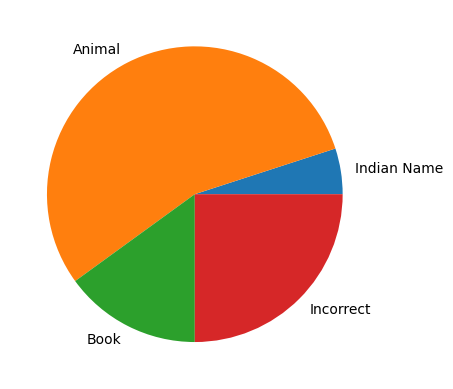

Category Distribution for the audio sample :  /content/drive/MyDrive/Minor Even 2023/audio samples/Rishima_animals.wav


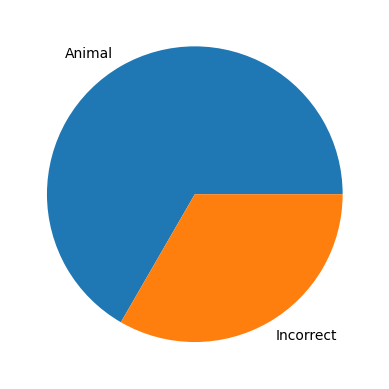

Category Distribution for the audio sample :  /content/drive/MyDrive/Minor Even 2023/audio samples/Rishima_audio_booknames.wav


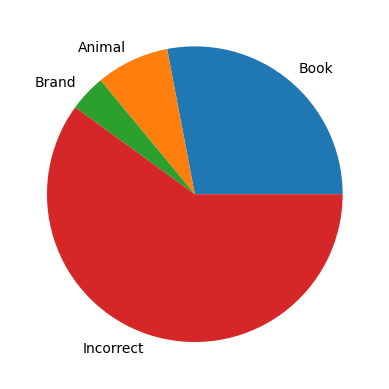

Category Distribution for the audio sample :  /content/drive/MyDrive/Minor Even 2023/audio samples/Soumya_animlas.wav


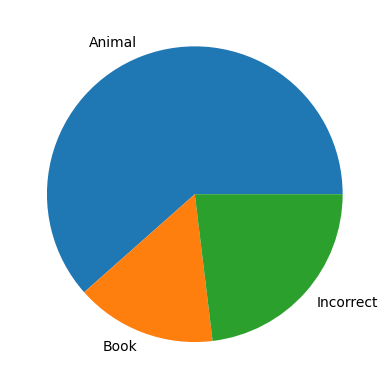

Category Distribution for the audio sample :  /content/drive/MyDrive/Minor Even 2023/audio samples/animal.wav


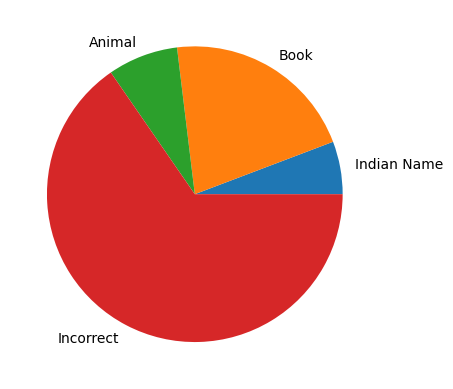

Category Distribution for the audio sample :  /content/drive/MyDrive/Minor Even 2023/audio samples/animals.wav


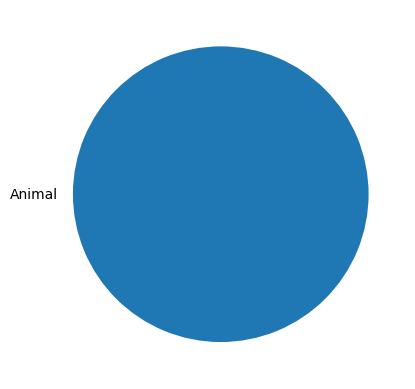

Category Distribution for the audio sample :  /content/drive/MyDrive/Minor Even 2023/audio samples/animals2.wav


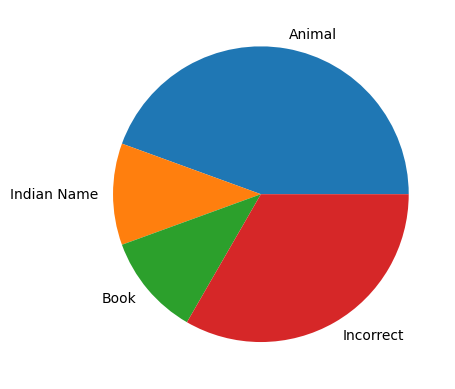

Category Distribution for the audio sample :  /content/drive/MyDrive/Minor Even 2023/audio samples/animals_colors.wav


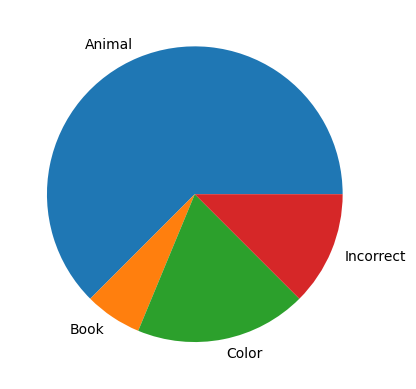

Category Distribution for the audio sample :  /content/drive/MyDrive/Minor Even 2023/audio samples/audio clip.wav


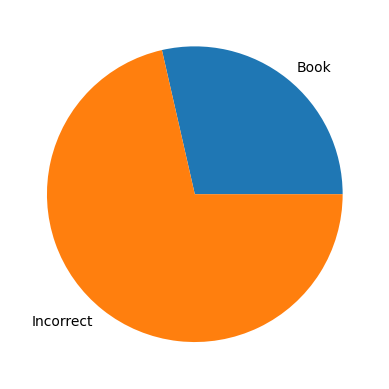

Category Distribution for the audio sample :  /content/drive/MyDrive/Minor Even 2023/audio samples/books_colors_animals_countries.wav


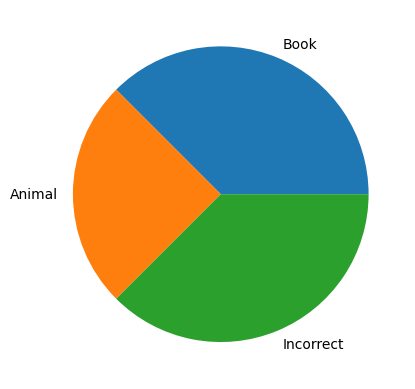

Category Distribution for the audio sample :  /content/drive/MyDrive/Minor Even 2023/audio samples/books_indian names.wav


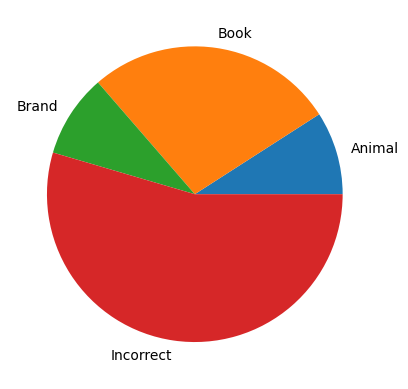

Category Distribution for the audio sample :  /content/drive/MyDrive/Minor Even 2023/audio samples/colors_books.wav


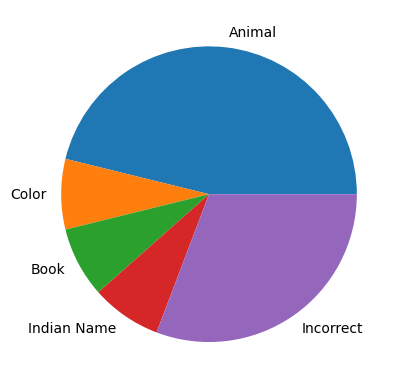

Category Distribution for the audio sample :  /content/drive/MyDrive/Minor Even 2023/audio samples/countries_colours.wav


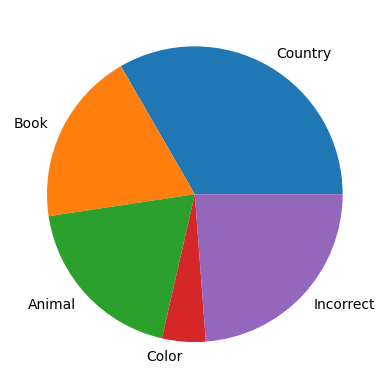

Category Distribution for the audio sample :  /content/drive/MyDrive/Minor Even 2023/audio samples/harvard.wav


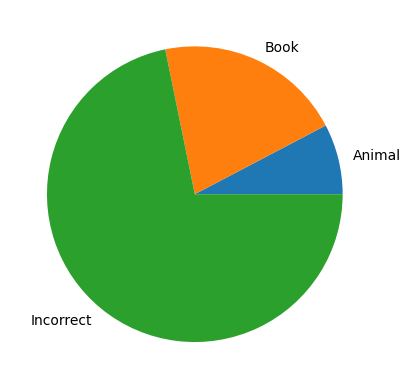

Category Distribution for the audio sample :  /content/drive/MyDrive/Minor Even 2023/audio samples/Audio_samples/Actor_01/03-01-01-03-01-01-01.wav


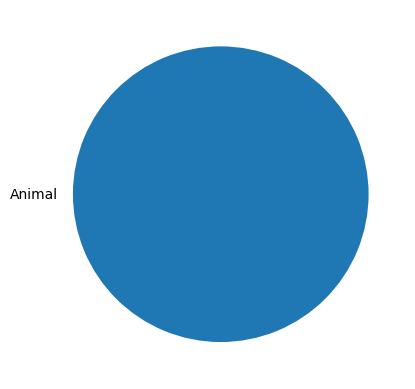

Category Distribution for the audio sample :  /content/drive/MyDrive/Minor Even 2023/audio samples/Audio_samples/Actor_01/03-01-02-01-01-02-01.wav


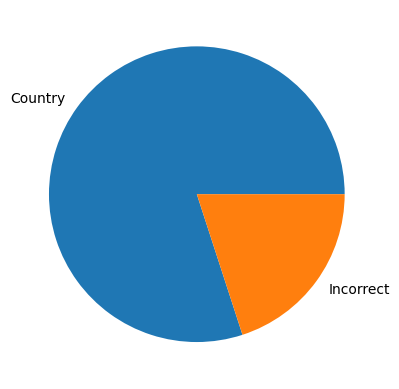

Category Distribution for the audio sample :  /content/drive/MyDrive/Minor Even 2023/audio samples/Audio_samples/Actor_01/03-01-02-01-02-01-01.wav


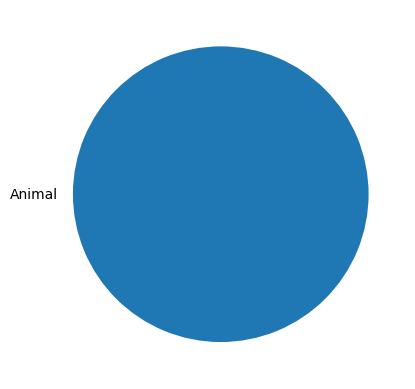

Category Distribution for the audio sample :  /content/drive/MyDrive/Minor Even 2023/audio samples/Audio_samples/Actor_01/03-01-02-04-01-01-01.wav


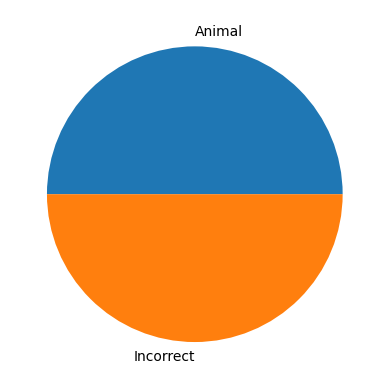

Category Distribution for the audio sample :  /content/drive/MyDrive/Minor Even 2023/audio samples/Audio_samples/Actor_01/03-01-03-03-02-01-01.wav


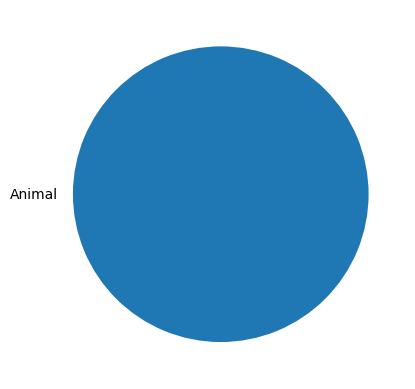

Category Distribution for the audio sample :  /content/drive/MyDrive/Minor Even 2023/audio samples/Audio_samples/Actor_01/03-01-04-04-01-02-01.wav


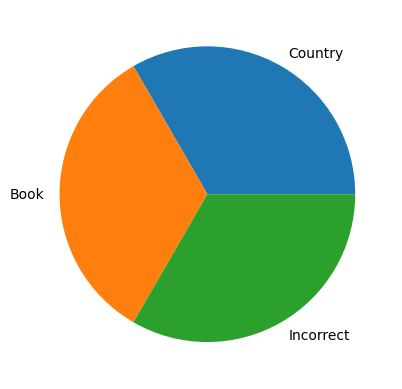

Category Distribution for the audio sample :  /content/drive/MyDrive/Minor Even 2023/audio samples/Audio_samples/Actor_01/03-01-05-05-02-02-01.wav


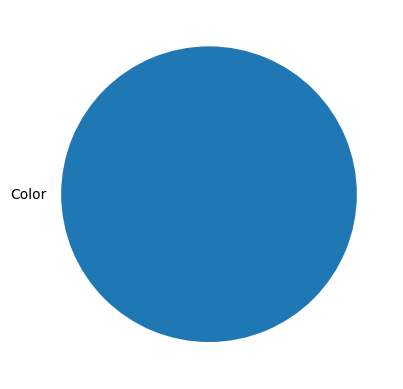

Category Distribution for the audio sample :  /content/drive/MyDrive/Minor Even 2023/audio samples/Audio_samples/Actor_02/03-01-02-01-01-01-02.wav


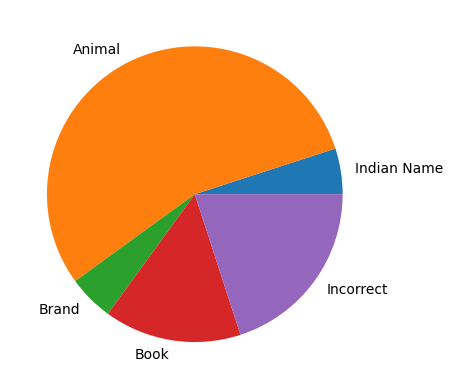

Category Distribution for the audio sample :  /content/drive/MyDrive/Minor Even 2023/audio samples/Audio_samples/Actor_02/03-01-02-01-01-02-02.wav


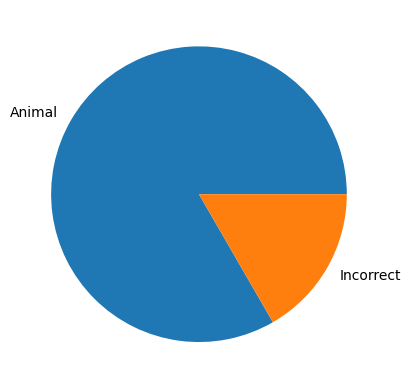

Category Distribution for the audio sample :  /content/drive/MyDrive/Minor Even 2023/audio samples/Audio_samples/Actor_02/03-01-02-01-02-02-02.wav


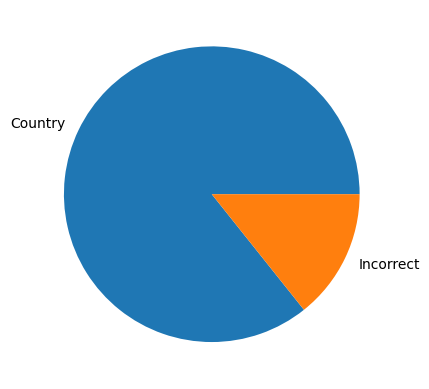

Category Distribution for the audio sample :  /content/drive/MyDrive/Minor Even 2023/audio samples/Audio_samples/Actor_02/03-01-06-01-02-01-02.wav


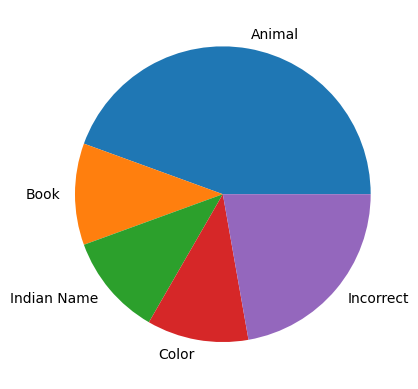

In [ ]:
def comparison(audiofile):
  print("Category Distribution for the audio sample : ", str(audiofile))
  audio_dict = identifycategory(audiofile)

  category = []
  quantity = []
  minus_flag = 0
  for k,v in audio_dict.items():
    if v not in category and v!=-1:
      category.append(v)
      quantity.append(1)
    elif v in category and v!=-1:
      i = category.index(v)
      quantity[i] = quantity[i]+1
    if v == -1:
      minus_flag=1
  
  if minus_flag == 1:
    category.append("Incorrect")
    quantity.append(0)
    i = quantity.index(0)
    for k,v in audio_dict.items():
      if v == -1:
        quantity[i] = quantity[i]+1


  plt.pie(quantity, labels = category)
  plt.show()

for x in audios:
  comparison(x)


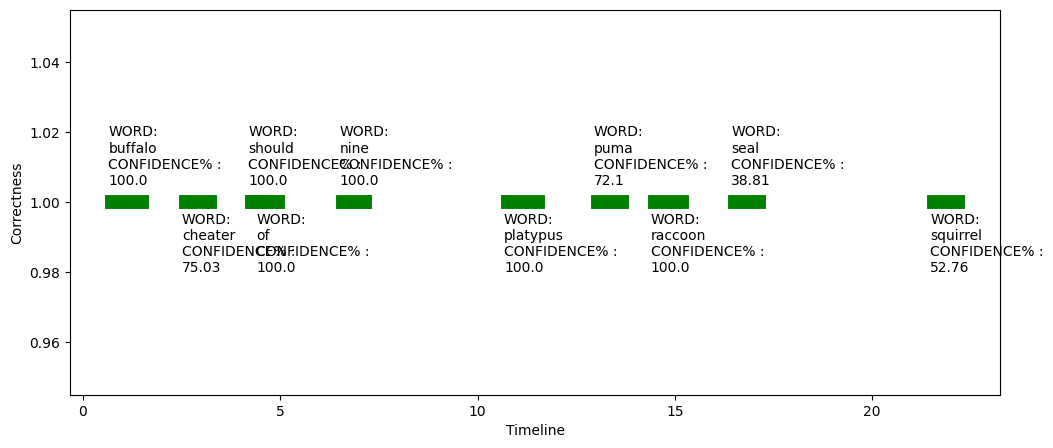

In [ ]:
def timestamps(audio_filename):
  class Word:
    def __init__(self, dict):
      self.conf = dict["conf"]
      self.end = dict["end"]
      self.start = dict["start"]
      self.word = dict["word"]

    def to_string(self):
      return "{:20} from {:.2f} sec to {:.2f} sec, confidence is {:.2f}%".format(self.word, self.start, self.end, self.conf*100)
    
    def to_list(self):
      return [self.word, self.start, self.end, str(self.conf*100)]

        
  custom_word=Word
  model_path = "/content/drive/MyDrive/Minor Even 2023/Vosk models/Indian_english/vosk-model-small-en-in-0.4"
  model = Model(model_path)
  wf = wave.open(audio_filename, "rb")
  rec = KaldiRecognizer(model, wf.getframerate())
  rec.SetWords(True)

  results = []

  while True:
    data = wf.readframes(4000)
    if len(data) == 0:
        break
    if rec.AcceptWaveform(data):
        part_result = json.loads(rec.Result())
        results.append(part_result)
  part_result = json.loads(rec.FinalResult())
  results.append(part_result)
  list_of_Words = []
  for sentence in results:
    if len(sentence) == 1:

        continue
    for obj in sentence['result']:
        w = Word(obj) 
        list_of_Words.append(w)  

  wf.close() 
  # for word in list_of_Words:
  #     print(word.to_string())
  timestamps = []   
  for word in list_of_Words:
    timestamps.append(word.to_list())
  plt.figure(figsize=(12,5)) 
  flag = 0
  for x in timestamps:
    label = "WORD:\n" + str(x[0]) + "\nCONFIDENCE% :\n"+str(round(float(x[3]),2))
    text_x = x[1] - 0.1
    x = np.array([x[1], x[2]])
    y = np.array([1,1])
    plt.plot(x, y, 'green', linewidth=10)
    if flag == 0:
      plt.annotate(label, xy =( x[1] , 1.02),    xytext =(text_x, 1.005))
      flag = 1
    else:
      plt.annotate(label, xy =( x[1] , 1.02),    xytext =(text_x, 0.98))
      flag = 0


    

  plt.xlabel("Timeline")
  plt.ylabel("Correctness")
  plt.show()

timestamps("/content/drive/MyDrive/Minor Even 2023/audio samples/Rishima_animals.wav")

In [ ]:
def sentimentSimilarity(audio):
  print("\n\nSENTIMENT SIMILARITY FOR THE AUDIO FILE : ", str(audio))
  myTable = PrettyTable(["Word", "Animals", "Colors", "Countries", "Brands", "Indian Names", "Books"])
  audio = sr.AudioFile(audio)
  words = audiotolist(audio)

  for x in words:
    x=nlp(x)
    myTable.add_row([x, x.similarity(nlp("Animals")),x.similarity(nlp("Colors")),x.similarity(nlp("Countries")),x.similarity(nlp("Brands")),x.similarity(nlp("Indian Names")),x.similarity(nlp("Books"))])

  print(myTable)

for x in audios:
  sentimentSimilarity(x)




SENTIMENT SIMILARITY FOR THE AUDIO FILE :  /content/drive/MyDrive/Minor Even 2023/audio samples/Ishita-animals.wav


<ipython-input-14-c4b3325cf854>:9: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  myTable.add_row([x, x.similarity(nlp("Animals")),x.similarity(nlp("Colors")),x.similarity(nlp("Countries")),x.similarity(nlp("Brands")),x.similarity(nlp("Indian Names")),x.similarity(nlp("Books"))])


+------------+---------------------+---------------------+----------------------+---------------------+----------------------+---------------------+
|    Word    |       Animals       |        Colors       |      Countries       |        Brands       |     Indian Names     |        Books        |
+------------+---------------------+---------------------+----------------------+---------------------+----------------------+---------------------+
|  fluency   |  0.4050089609639463 | 0.44961385883278265 |  0.3505492701222302  | 0.38382381058553006 |  0.3661825903403178  | 0.46662237772500675 |
|    test    | 0.39923728773073014 | 0.40603328763072566 | 0.45574032297921707  | 0.44276540196830266 |  0.3494338696617755  | 0.37443701293065296 |
|    for     | 0.07881284098570855 | 0.16947595599456383 | 0.08378134837804006  |  0.0854010546707994 |  0.1452036268754629  | 0.14247555262182973 |
|  animals   |  0.8549587853443852 |  0.7599163242467405 |  0.7580027679526691  |  0.7146651878215731 | 0.

In [ ]:

!pip install aubio


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 479.0/479.0 kB 18.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for aubio: filename=aubio-0.4.9-cp310-cp310-linux_x86_64.whl size=434031 sha256=0df1ec3c9c367cee6ec6dcd404951672a666cbf34794cf053e70fcf9c806210d
  Stored in directory: /root/.cache/pip/wheels/00/30/30/a06fe7e9c7fe740486c219851b2bc1c7ed4a97e9c257efd3d7
Successfully built aubio


In [ ]:
!pip install pyreaper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.4/59.4 kB 4.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pyreaper: filename=pyreaper-0.0.9-cp310-cp310-linux_x86_64.whl size=653072 sha256=e9478ba282c70f32ba96878cf6c240425ad8b156add48fd8fb281258fedfa026
  Stored in directory: /root/.cache/pip/wheels/65/5f/d9/c34c428a8075ec57d6f6c885bebf740e7b2ed2fe82457066ae
Successfully built pyreaper


In [ ]:
!pip install python_speech_features
import scipy.io.wavfile as wav
from python_speech_features import mfcc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pydub
import numpy as np
import statistics
from python_speech_features import mfcc
def compute_prosody_features(file_path, myTable):
    # Load audio file
    audio = pydub.AudioSegment.from_file(file_path)
    (rate,sig) = wav.read(file_path)
    mfcc_feat = mfcc(sig, rate)

    # Convert to mono and set sample rate to 44100 Hz
    audio = audio.set_channels(1)
    audio = audio.set_frame_rate(44100)

    # Convert to numpy array
    signal = np.array(audio.get_array_of_samples())

    # Compute fundamental frequency using autocorrelation
    pitch = []
    hop_size = 512
    window_size = 2048
    for i in range(0, len(signal) - window_size, hop_size):
        frame = signal[i:i+window_size]
        corr = np.correlate(frame, frame, mode='full')
        corr = corr[len(corr)//2:]
        lag = np.argmax(corr[:441]) + 1
        pitch_val = 44100 / lag
        pitch.append(pitch_val)
    pitch = np.array(pitch)

    # Compute prosody features
    duration = len(signal) / 44100
    energy = np.sum(signal ** 2) / duration
    speech_rate = len(pitch) / duration
    f0_mean = np.mean(pitch)
    f0_median = np.median(pitch)
    f0_std = np.std(pitch)

    #mfcc = pydub.playback._compute_rms_mfcc(signal, 44100)

    mfcc_mean = np.mean(mfcc_feat)
    mfcc_std = np.std(mfcc_feat)

    myTable.add_row([str(file_path),duration, energy,speech_rate, f0_mean, f0_median, f0_std, mfcc_mean, mfcc_std ])



In [ ]:
myTable = PrettyTable(["AUDIO", "duration", "energy", "speech_rate", "f0_mean", "f0_median", "f0_std", "mfcc_mean", "mfcc_std"])

for x in audios:
  compute_prosody_features(x,myTable )
print(myTable)

<ipython-input-47-11710bfe64a0>:8: WavFileWarning: Reached EOF prematurely; finished at 65413199 bytes, expected 4294967303 bytes from header.
  (rate,sig) = wav.read(file_path)


+------------------------------------------------------------------------------------------------------+--------------------+--------------------+-------------------+--------------------+--------------------+--------------------+----------------------+--------------------+
|                                                AUDIO                                                 |      duration      |       energy       |    speech_rate    |      f0_mean       |     f0_median      |       f0_std       |      mfcc_mean       |      mfcc_std      |
+------------------------------------------------------------------------------------------------------+--------------------+--------------------+-------------------+--------------------+--------------------+--------------------+----------------------+--------------------+
|               /content/drive/MyDrive/Minor Even 2023/audio samples/Ishita-animals.wav                | 32.04353741496599  | 32298620.73581861  | 86.00798233695652 | 15856.35226